# CIFAR CNN Classification

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import _pickle as cPickle
import numpy as np

In [2]:
file = {}
alldict = {}
for i in range(5):
    file[i] = open('cifar-10-batches-py/data_batch_'+str(i+1), 'rb')
    dict = cPickle.load(file[i],  encoding='iso-8859-1')
    alldict[i] = dict
    for key in dict:
        print (key)
x_test = []#mnist.test.images.reshape(-1,28,28)
Y_test = []#mnist.test.labels

batch_label
filenames
labels
data
batch_label
filenames
labels
data
batch_label
filenames
labels
data
batch_label
filenames
labels
data
batch_label
filenames
labels
data


In [3]:
train_data = None
train_label = []
for i in range(5):
    if train_data != None:
        train_data = np.vstack((train_data,alldict[i]['data']))
        train_label = train_label + alldict[i]['labels']
    else:
        train_data = alldict[i]['data']
        train_label = alldict[i]['labels']

c:\users\mayoor_rao\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  after removing the cwd from sys.path.


In [4]:
len(train_label)

50000

In [5]:
file = open('cifar-10-batches-py/test_batch', 'rb')
dict = cPickle.load(file,  encoding='iso-8859-1')
for key in dict:
    print (key)


batch_label
filenames
labels
data


In [6]:
train_data = train_data#dict['data'][:7000]
train_label = np.array(train_label)#np.array(dict['labels'][0:7000])
train_label = train_label.reshape(train_label.shape[0],1)
test_data = dict['data']#dict['data'][7000:]
test_label = np.array(dict['labels'])#np.array(dict['labels'][7000:])
test_label = test_label.reshape(test_label.shape[0],1)
class_names_f = open('cifar-10-batches-py/batches.meta', 'rb')
label_names = cPickle.load(class_names_f)

image_size = 32
num_labels = 10
num_channels = 3 # RGB

def reformatDataset(dataset):
    temp = dataset.reshape((-1,num_channels,image_size*image_size))
    temp = temp.transpose([0,2,1])
    temp = temp.reshape((-1,image_size, image_size, num_channels))
    print (temp.shape)
    return temp

train_dataset = reformatDataset(train_data)
test_dataset = reformatDataset(test_data)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from random import randint, shuffle


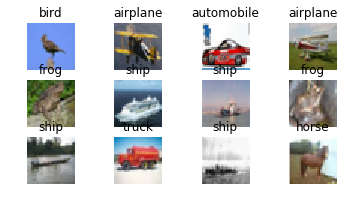

In [8]:
figure = plt.figure()
for i in range(12):
    ax1 = figure.add_subplot(4,4,i+1)
    data_index = randint(0,7000)
    sample_data = train_dataset[data_index]
    plt.axis("off")
    plt.imshow(sample_data, cmap=plt.cm.hot)
    ax1.set_title(label_names['label_names'][train_label[data_index][0]])

In [9]:
#print (label_names['label_names'][6])
#print (train_label.reshape(train_label.shape[0],1))
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(train_label )
train_label = enc.transform(train_label).toarray()
test_label = enc.transform(test_label).toarray()

In [10]:
patch_size = 5
depth = 64
channel = 3
N_CLASSES = 10
LEARNING_RATE = 0.1

global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

with tf.variable_scope('data') as scope:
    X_org = tf.placeholder(tf.float32, shape=[None,32,32,3])
    Y = tf.placeholder(tf.float32, shape=[None,10])
    X_org_test = tf.placeholder(tf.float32, shape=[None,32,32,3])
    Y_test = tf.placeholder(tf.float32, shape=[None,10])

with tf.variable_scope('conv1') as scope:
    kernel = tf.get_variable('kernel', [patch_size, patch_size, channel, depth], initializer=tf.truncated_normal_initializer())
    biases = tf.get_variable('biases', [depth],     initializer=tf.random_normal_initializer())
    X = X_org
    cnet1 = tf.nn.conv2d(X, kernel, [1,1,1,1], padding='SAME')
    o1 = tf.nn.relu(cnet1 + biases)
    pool1 = tf.nn.max_pool(o1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1],padding='SAME', name='pool1')
    norm1 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')


with tf.variable_scope('conv2') as scope:
    kernel = tf.get_variable('kernel', [patch_size, patch_size, depth, depth], initializer=tf.truncated_normal_initializer())
    biases = tf.get_variable('biases', [depth], initializer=tf.random_normal_initializer())
    cnet2 = tf.nn.conv2d(norm1, kernel, [1,1,1,1], padding='SAME')

    o_2 = tf.nn.relu(cnet2 + biases)
    norm2 = tf.nn.lrn(o_2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')
    o2 = tf.nn.max_pool(norm2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1],padding='SAME', name='pool2')


with tf.variable_scope('fc') as scope:
    o2_shape = o2.get_shape().as_list()
    input_size = o2_shape[1]*o2_shape[2]*o2_shape[3]
    print (type(input_size))
    input_l = tf.reshape(o2,shape=[-1,input_size])
    w = tf.get_variable('weights', [input_size,1024], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('b', [1024], initializer=tf.truncated_normal_initializer())
    fc = tf.nn.relu(tf.matmul(input_l,w) + b)
    
with tf.variable_scope('softmax_layer') as scope:
    w = tf.get_variable('weights', [1024, N_CLASSES], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('biases', [N_CLASSES], initializer=tf.random_normal_initializer())
    logits = tf.matmul(fc, w) + b
    
with tf.variable_scope('loss') as scope:
    entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)
    loss = tf.reduce_mean(entropy, name='loss')
    


<class 'int'>


In [11]:
decayed_learning_rate = tf.train.exponential_decay(0.1, global_step, 700, 1)
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss, global_step=global_step)

#optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
#optimizer = tf.train.AdagradOptimizer(decayed_learning_rate).minimize(loss)


In [12]:
import random
def getBatchIndex(max_num, size, i):
    #return random.sample(range(1, max_num), size)
    return range((size*i),(size*(i+1)))

def nextBatch(index, data, label):
    return data[index], label[index]

dog


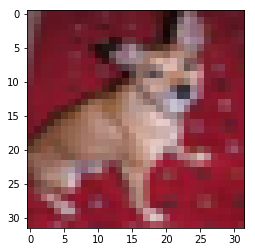

In [13]:
BATCH_SIZE = 128
n_batches = 2000
SKIP_STEP = 100
TRAINING_SIZE = 50000
TESTING_SIZE = 10000

X_BATCH, Y_BATCH = nextBatch(getBatchIndex(TRAINING_SIZE, BATCH_SIZE, 10),train_dataset ,train_label )
Y_BATCH[0]
plt.imshow(X_BATCH[0], cmap=plt.cm.hot)
print (label_names['label_names'][np.argmax(Y_BATCH[0])])

In [14]:
BATCH_SIZE = 100
n_batches = 500
SKIP_STEP = 100
TRAINING_SIZE = 50000
TESTING_SIZE = 10000

import os
import time

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver = tf.train.Saver()
    writer = tf.summary.FileWriter('./my_graph/cifar', sess.graph)
    #ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/cifar_new/checkpoint'))
    #if ckpt and ckpt.model_checkpoint_path:
    #    saver.restore(sess, ckpt.model_checkpoint_path)
    initial_step = global_step.eval()
    start_time = time.time()
    total_loss = 0.0
    print (n_batches)
    pred_tf = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(pred_tf,1), tf.argmax(Y,1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
    
    for ep in range(0,100):
        for index in range(initial_step, n_batches):
            X_BATCH, Y_BATCH = nextBatch(getBatchIndex(TRAINING_SIZE, BATCH_SIZE, index),train_dataset ,train_label )
            #X_BATCH = X_BATCH.reshape(-1,32,32)#train_data[initial_step*BATCH_SIZE:(initial_step*BATCH_SIZE)+BATCH_SIZE]
            loss_batch, _ = sess.run([loss, optimizer], feed_dict={X_org:X_BATCH,Y:Y_BATCH})
            total_loss += loss_batch
            if (index + 1) % SKIP_STEP == 0:
                print (loss_batch)
                print('Average loss at step {}: {:5.1f}'.format(index + 1, total_loss / SKIP_STEP))

    n_batches = int(TESTING_SIZE/100)
    total_correct_preds = 0
    for i in range(n_batches):
        XT_BATCH, YT_BATCH = nextBatch(getBatchIndex(TESTING_SIZE, BATCH_SIZE,i),test_dataset ,test_label)
        #XT_BATCH, YT_BATCH = nextBatch(getBatchIndex(TRAINING_SIZE, BATCH_SIZE, i),train_dataset ,train_label )
        #XT_BATCH = XT_BATCH.reshape(-1,32,32,3)
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], 
                                               feed_dict={X_org: XT_BATCH, Y:YT_BATCH}) 
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(YT_BATCH, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        correct_pred = sess.run(accuracy)   
        total_correct_preds += correct_pred
        print (total_correct_preds, correct_pred, BATCH_SIZE)
        print("Accuracy {0}".format(total_correct_preds/(BATCH_SIZE*n_batches)))
        
        #print ("Accuracy = {0}".format(cor_pres_count/BATCH_SIZE))


500
5299.39
Average loss at step 100: 10971.7
4234.52
Average loss at step 200: 15802.2
3452.0
Average loss at step 300: 19623.1
2692.12
Average loss at step 400: 22909.7
2302.81
Average loss at step 500: 25831.8
2228.07
Average loss at step 100: 28438.8
2296.33
Average loss at step 200: 30802.1
1921.8
Average loss at step 300: 32949.4
1643.08
Average loss at step 400: 34982.8
1646.99
Average loss at step 500: 36895.5
1425.91
Average loss at step 100: 38664.6
1700.87
Average loss at step 200: 40352.9
1372.35
Average loss at step 300: 41921.8
1215.24
Average loss at step 400: 43461.1
1396.11
Average loss at step 500: 44918.5
966.998
Average loss at step 100: 46276.0
1338.36
Average loss at step 200: 47594.2
1042.14
Average loss at step 300: 48838.5
971.631
Average loss at step 400: 50082.0
1199.87
Average loss at step 500: 51253.9
736.211
Average loss at step 100: 52347.9
1087.33
Average loss at step 200: 53424.8
888.574
Average loss at step 300: 54457.8
766.38
Average loss at step 400:

200.511
Average loss at step 500: 112958.2
185.456
Average loss at step 100: 113117.0
146.503
Average loss at step 200: 113278.9
154.419
Average loss at step 300: 113431.6
147.227
Average loss at step 400: 113591.1
187.976
Average loss at step 500: 113756.3
188.294
Average loss at step 100: 113914.7
144.157
Average loss at step 200: 114072.8
144.265
Average loss at step 300: 114223.5
149.351
Average loss at step 400: 114380.4
185.814
Average loss at step 500: 114542.7
187.648
Average loss at step 100: 114696.0
141.902
Average loss at step 200: 114852.1
147.163
Average loss at step 300: 114999.6
144.976
Average loss at step 400: 115153.4
194.58
Average loss at step 500: 115310.2
167.736
Average loss at step 100: 115459.3
137.056
Average loss at step 200: 115610.5
145.135
Average loss at step 300: 115754.5
142.955
Average loss at step 400: 115905.6
184.153
Average loss at step 500: 116056.0
167.562
Average loss at step 100: 116202.7
139.223
Average loss at step 200: 116351.2
126.803
Aver

82.0529
Average loss at step 200: 135888.0
88.8296
Average loss at step 300: 135977.2
99.8976
Average loss at step 400: 136073.2
109.153
Average loss at step 500: 136167.4
95.5786
Average loss at step 100: 136260.1
88.1139
Average loss at step 200: 136350.3
101.378
Average loss at step 300: 136439.4
91.7707
Average loss at step 400: 136533.1
110.57
Average loss at step 500: 136624.5
108.045
Average loss at step 100: 136712.7
91.2304
Average loss at step 200: 136802.0
95.6535
Average loss at step 300: 136892.5
98.366
Average loss at step 400: 136986.9
111.108
Average loss at step 500: 137078.8
99.7462
Average loss at step 100: 137166.5
85.0198
Average loss at step 200: 137255.3
79.5529
Average loss at step 300: 137346.9
86.2104
Average loss at step 400: 137438.6
104.19
Average loss at step 500: 137527.9
94.431
Average loss at step 100: 137614.0
98.637
Average loss at step 200: 137702.9
78.9502
Average loss at step 300: 137791.1
81.6348
Average loss at step 400: 137880.7
97.8632
Average 